In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [87]:
df = pd.read_csv("Maternal Health.csv")

In [88]:
initial_rows, initial_cols = df.shape
updated_rows, updated_cols = df.shape

In [89]:
NullValues = df.isnull().sum().sum()
if NullValues > 0:
    print(f"{NullValues} null values found in the dataset. Handling null values...")
    df.dropna(inplace=True)
    print("Null values have been removed.")

In [90]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f"{duplicate_count} duplicate rows found in the dataset. Handling duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

562 duplicate rows found in the dataset. Handling duplicates...
Duplicate rows have been removed.


In [91]:
print("\nDataset Information After Cleaning:")
print(df.info())

print("\nSummary Statistics After Cleaning:")
print(df.describe())

print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 28.2 KB
None

Summary Statistics After Cleaning:
              Age  SystolicBP  DiastolicBP          BS    BodyTemp  \
count  452.000000  452.000000   452.000000  452.000000  452.000000   
mean    29.194690  110.553097    75.418142    8.346173   98.692478   
std     13.767379   17.872282    13.754578    2.829209    1.410897   
min     10.000000   70.000000    49.000000    6.000000   98.000000   
25%     19.000000   90.000000    65.000000  

<Axes: >

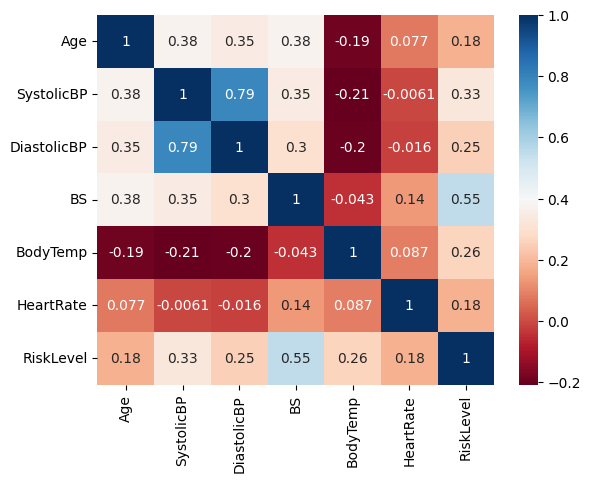

In [92]:
sns.heatmap(df.corr(), cmap='RdBu', annot = True)

In [93]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

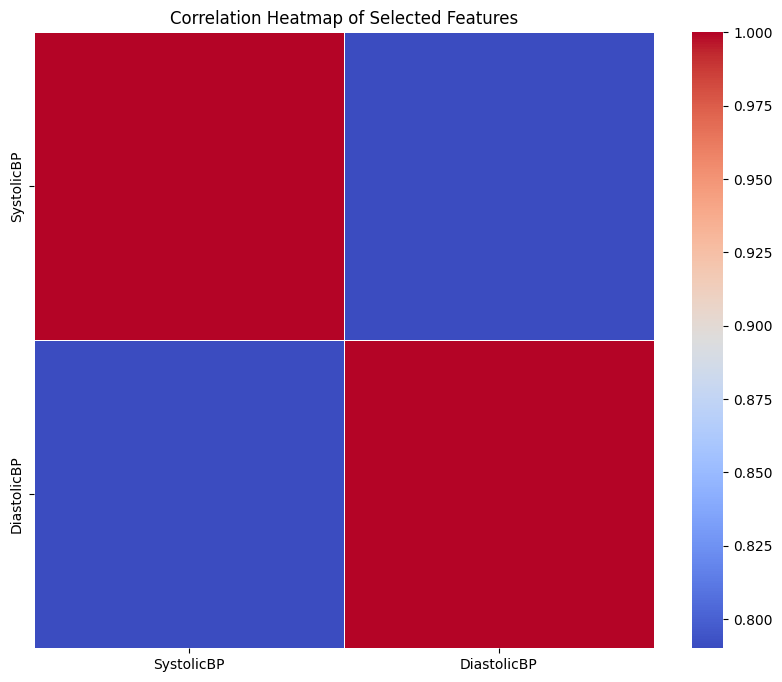

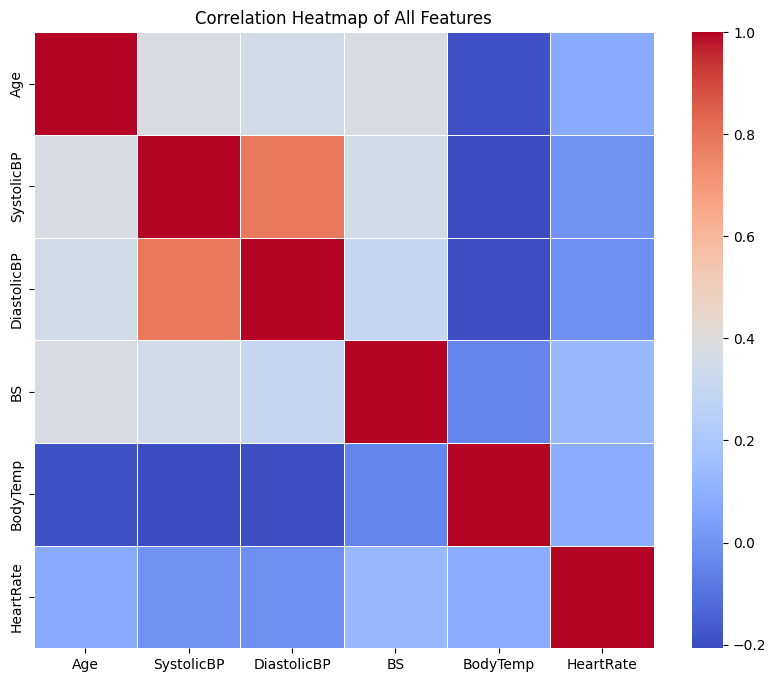

In [94]:
X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = df['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_selected = df[['SystolicBP', 'DiastolicBP']]

X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

cormatrix_selected = X_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cormatrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

cormatrix_all = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cormatrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

ml_algo = {
    "Logistic Regression": LogisticRegression(max_iter=30000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

output_all = {}
for name, model in ml_algo.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    output_all[name] = accuracy

output_selected = {}
for name, model in ml_algo.items():
    model.fit(X_selected_train, y_train)
    y_pred = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, y_pred)
    output_selected[name] = accuracy

visual_output = pd.DataFrame({
    "Model": list(output_all.keys()) + list(output_selected.keys()),
    "Accuracy": list(output_all.values()) + list(output_selected.values()),
    "Feature Selection": ['All Features'] * len(ml_algo) + ['Selected Features'] * len(ml_algo)
})


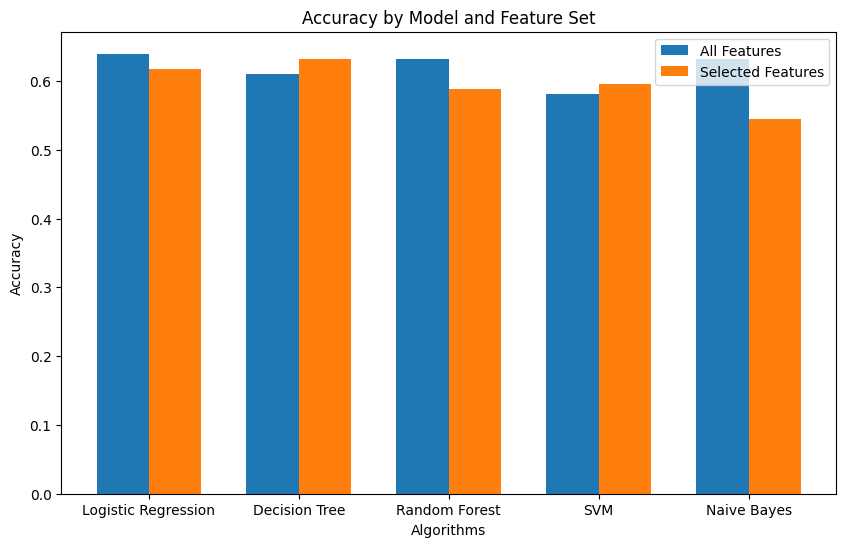

In [95]:
algorithm_data = {
    'Logistic Regression': {'All Features': [list(output_all.values())[0]], 'Selected Features': [list(output_selected.values())[0]]},
    'Decision Tree': {'All Features': [list(output_all.values())[1]], 'Selected Features': [list(output_selected.values())[1]]},
    'Random Forest': {'All Features' :[list(output_all.values())[2]], 'Selected Features': [list(output_selected.values())[2]]},
    'SVM': {'All Features': [list(output_all.values())[3]], 'Selected Features': [list(output_selected.values())[3]]},
    'Naive Bayes': {'All Features': [list(output_all.values())[4]], 'Selected Features': [list(output_selected.values())[4]]}
}

models_data = list(algorithm_data.keys())
all_features_accuracy = [algorithm_data[model]['All Features'][0] for model in models_data]
selected_features_accuracy = [algorithm_data[model]['Selected Features'][0] for model in models_data]

x = np.arange(len(models_data))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

rectangle_1 = ax.bar(x - width/2, all_features_accuracy, width, label='All Features')
rectangle_2 = ax.bar(x + width/2, selected_features_accuracy, width, label='Selected Features')

ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Feature Set')
ax.set_xticks(x)
ax.set_xticklabels(models_data)
ax.legend()

plt.show()

In [96]:
output_all = {}
for name, model in ml_algo.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    output_all[name] = accuracy

print("ACCURACY SCORES WITH ALL FEATURES:")
for name, accuracy in output_all.items():
    print(f"{name}: {accuracy*100:.2f}%")

output_selected = {}
for name, model in ml_algo.items():
    model.fit(X_selected_train, y_train)
    y_pred = model.predict(X_selected_test)
    accuracy = accuracy_score(y_test, y_pred)
    output_selected[name] = accuracy

print("\nACCURACY SCORES WITH SELECTED FEATURES:")
for name, accuracy in output_selected.items():
    print(f"{name}: {accuracy*100:.2f}%")



ACCURACY SCORES WITH ALL FEATURES:
Logistic Regression: 63.97%
Decision Tree: 61.03%
Random Forest: 63.24%
Support Vector Machine: 58.09%
Naive Bayes: 63.24%

ACCURACY SCORES WITH SELECTED FEATURES:
Logistic Regression: 61.76%
Decision Tree: 63.24%
Random Forest: 58.82%
Support Vector Machine: 59.56%
Naive Bayes: 54.41%


C:\Users\giore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


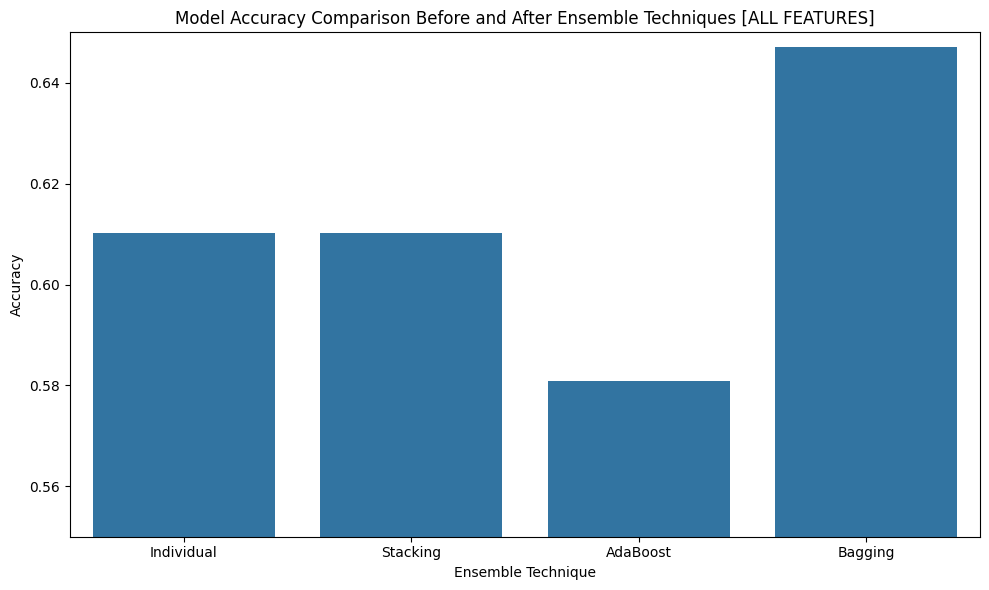

Summary of Model Accuracies:
Individual: 0.6103
Stacking: 0.6103
AdaBoost: 0.5809
Bagging: 0.6471


In [97]:
best_model = max(output_selected, key=output_selected.get)
top_model = ml_algo[best_model]

top_model.fit(X_train, y_train)
predictions_highest = top_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

stacking_ens = StackingClassifier(estimators=[('highest_model', top_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_ens.fit(X_train, y_train)
stacking_score = stacking_ens.score(X_test, y_test)

adaboost_ens = AdaBoostClassifier(estimator=top_model, n_estimators=100)
adaboost_ens.fit(X_train, y_train)
adaboost_score = adaboost_ens.score(X_test, y_test)

bagging_ens = BaggingClassifier(estimator=top_model, n_estimators=100)
bagging_ens.fit(X_train, y_train)
bagging_score = bagging_ens.score(X_test, y_test)

models_performance = {
    "Individual": accuracy_highest,
    "Stacking": stacking_score,
    "AdaBoost": adaboost_score,
    "Bagging": bagging_score
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_performance.keys()), y=list(models_performance.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques [ALL FEATURES]')
plt.ylim(0.55, 0.65)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
for model, accuracy in models_performance.items():
    print(f"{model}: {accuracy:.4f}")

C:\Users\giore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


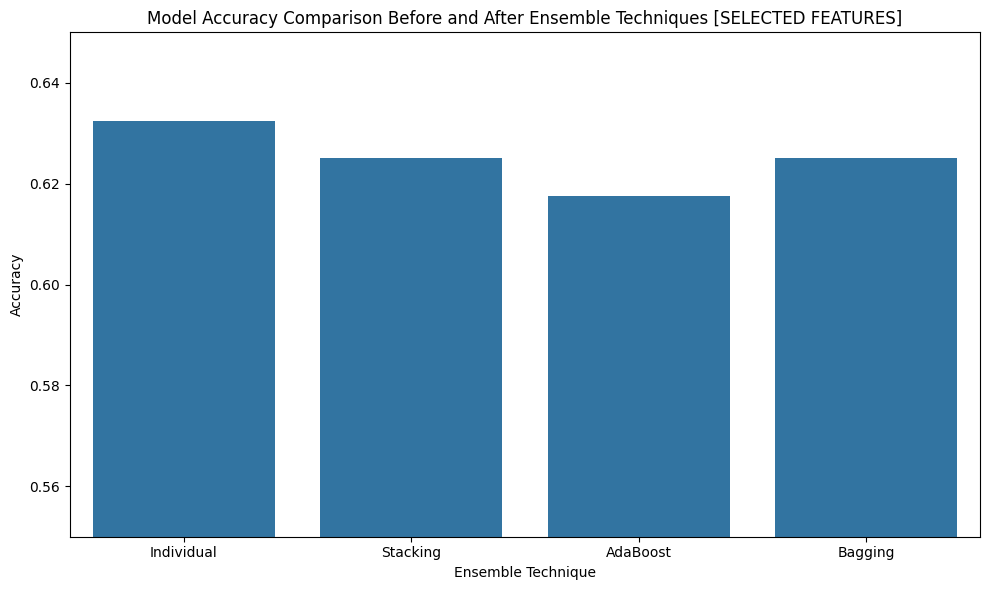

Summary of Model Accuracies:
Individual: 0.6324
Stacking: 0.6250
AdaBoost: 0.6176
Bagging: 0.6250


In [98]:
model_best = max(output_selected, key=output_selected.get)
model_top = ml_algo[model_best]

model_top.fit(X_selected_train, y_train)
predictions_highest = model_top.predict(X_selected_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

stacking_ens = StackingClassifier(estimators=[('highest_model', model_top)], final_estimator=LogisticRegression(max_iter=10000))
stacking_ens.fit(X_selected_train, y_train)
stacking_score = stacking_ens.score(X_selected_test, y_test)

adaboost_ens = AdaBoostClassifier(estimator=model_top, n_estimators=100)
adaboost_ens.fit(X_selected_train, y_train)
adaboost_score = adaboost_ens.score(X_selected_test, y_test)

bagging_ens = BaggingClassifier(estimator=model_top, n_estimators=100)
bagging_ens.fit(X_selected_train, y_train)
bagging_score = bagging_ens.score(X_selected_test, y_test)

models_performance = {
    "Individual": accuracy_highest,
    "Stacking": stacking_score,
    "AdaBoost": adaboost_score,
    "Bagging": bagging_score
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_performance.keys()), y=list(models_performance.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques [SELECTED FEATURES]')
plt.ylim(0.55, 0.65)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
for model, accuracy in models_performance.items():
    print(f"{model}: {accuracy:.4f}")

In [99]:
models_performance = {
    "\nINDIVIDUAL": {
        "Accuracy": accuracy_highest,
        "F1-Score": f1_score(y_test, predictions_highest, average='weighted'),
        "Precision": precision_score(y_test, predictions_highest, average='weighted'),
        "Recall": recall_score(y_test, predictions_highest, average='weighted')
    },
    "\nSTACKING": {
        "Accuracy": stacking_score,
        "F1-Score": f1_score(y_test, stacking_ens.predict(X_selected_test), average='weighted'),
        "Precision": precision_score(y_test, stacking_ens.predict(X_selected_test), average='weighted'),
        "Recall": recall_score(y_test, stacking_ens.predict(X_selected_test), average='weighted')
    },
    "\nADABOOST": {
        "Accuracy": adaboost_score,
        "F1-Score": f1_score(y_test, adaboost_ens.predict(X_selected_test), average='weighted'),
        "Precision": precision_score(y_test, adaboost_ens.predict(X_selected_test), average='weighted'),
        "Recall": recall_score(y_test, adaboost_ens.predict(X_selected_test), average='weighted')
    },
    "\nBAGGING": {
        "Accuracy": bagging_score,
        "F1-Score": f1_score(y_test, bagging_ens.predict(X_selected_test), average='weighted'),
        "Precision": precision_score(y_test, bagging_ens.predict(X_selected_test), average='weighted'),
        "Recall": recall_score(y_test, bagging_ens.predict(X_selected_test), average='weighted')
    }
}

print("\nMODEL SCORES SUMMARYs:")
for model, scores in models_performance.items():
    print(f"{model}:")
    for score_name, score_value in scores.items():
        print(f"{score_name}: {score_value:.4f}")




MODEL SCORES SUMMARYs:

INDIVIDUAL:
Accuracy: 0.6324
F1-Score: 0.5751
Precision: 0.7002
Recall: 0.6324

STACKING:
Accuracy: 0.6250
F1-Score: 0.5629
Precision: 0.6882
Recall: 0.6250

ADABOOST:
Accuracy: 0.6176
F1-Score: 0.5650
Precision: 0.6631
Recall: 0.6176

BAGGING:
Accuracy: 0.6250
F1-Score: 0.5767
Precision: 0.6408
Recall: 0.6250
